## CVE Explore

In [1]:
import xml.etree.ElementTree as ET
import xmltodict
import json
import os
import pandas as pd
import spacy
import numpy as np
import nltk
from nltk import bigrams
import itertools
import seaborn as sns
from itertools import combinations, permutations

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_lg")
import pprint
pp = pprint.PrettyPrinter(indent=4)

## Load CVE Data

In [2]:
with open('Data/all_CVE_data.json') as f:
    cve_dict = json.load(f)

## Get CVE Descriptions

In [3]:
Desc = []

# About 202,000 Items
file_name = 'Data/all_CVE_descriptions.txt'
with open(file_name, 'w') as f:
    for i in range(len(cve_dict['cve']['item'])):
        Desc.append(cve_dict['cve']['item'][i]['desc'])
        f.write(cve_dict['cve']['item'][i]['desc'] +'\n')
f.close()

## Generate corpus

In [4]:
# Create corpus from CVE descriptions
corpus = ''

for desc in Desc:
    try:
        corpus += desc + ' '
    except:
        if desc:
            corpus += desc['html:p'][0]

In [5]:
with open("data/CVE_corpus.txt", "w") as text_file:
    text_file.write(corpus)

## Load Autphrase results
The Autophraser is executed separately using the CAPEC_corpus.txt file renamed to DBLP.txt

In [6]:
with open('data/AutoPhrase_multi-words.txt') as f:
    lines = [line.rstrip() for line in f]

In [7]:
float(lines[0].split('\t')[0])

0.9717230778

In [8]:
threshold = 0.8
phrases_list = []
for line in lines:
    score = float(line.split('\t')[0])
    if score >= threshold:
        phrases_list.append(line.split('\t')[1])

In [9]:
# Print example phrases
phrases_list[0:10]

['active directory',
 'rest api',
 'address book',
 'open source',
 'virtual machine',
 'tcp ip',
 'apache tomcat',
 'link layer',
 'knowledge base',
 'graphics driver']

## Get descriptions, tokenize, make lower-case, and remove punctuation

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  

In [11]:
# Apply on the "Desc" list of descriptions instead of the aggregate corpus

## Tokenize descriptions and remove punctuation. Combine into list of single strings.

In [12]:
filtered_descriptions = []
for desc in Desc:
    if isinstance(desc,str):
        description = desc
    elif desc:
        description = desc['html:p'][0]
    word_tokens = word_tokenize(description.lower())
    temp_list = []
    for w in word_tokens:  
        if w.isalpha():
            temp_list.append(w)  
    filtered_descriptions.append(" ".join(temp_list))

## Initialize co-occurrence matrix

In [13]:
## Generate co-occurrence matrix
data_matrix = pd.DataFrame(0, index = phrases_list, columns = phrases_list)
data_matrix.head()

,active directory,rest api,address book,open source,virtual machine,tcp ip,apache tomcat,link layer,knowledge base,graphics driver,...,sun java system web server,software distribution,write operations,lg mobile,unknown vectors,client software,cross site scripting,eset smart security,java se development kit,reflective xss
active directory,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rest api,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
address book,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
open source,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
virtual machine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## Iterate over each description and update the co-occurrence matrix
for desc in filtered_descriptions:
    phrases_found = []
    for phrase in phrases_list:
        if phrase in desc:
            phrases_found.append(phrase)
    #all_phrases.append(phrases_found)
    #comb = sorted(list(combinations(phrases_found, 2)))
    #comb = list(combinations(phrases_found, 2))
    perm = list(permutations(phrases_found,2))
    for phrase in phrases_found:
        perm.append((phrase,phrase))
    for i in perm: 
        data_matrix.loc[i[0],i[1]]+=1

In [15]:
data_matrix.head()

,active directory,rest api,address book,open source,virtual machine,tcp ip,apache tomcat,link layer,knowledge base,graphics driver,...,sun java system web server,software distribution,write operations,lg mobile,unknown vectors,client software,cross site scripting,eset smart security,java se development kit,reflective xss
active directory,136,0,0,3,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
rest api,0,185,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
address book,0,0,83,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
open source,3,0,0,225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
virtual machine,1,1,0,0,235,0,0,0,0,2,...,0,0,0,0,13,0,0,0,1,0


## Sort by the sum of the all columns

In [16]:
#Sort rows of data_matrix by the sum of the columns of each row in descending order
data_matrix['sum_column'] = data_matrix.sum(axis=1)
data_matrix = data_matrix.sort_values(by='sum_column', ascending=False)
data_matrix = data_matrix.drop(columns=['sum_column'])
data_matrix.head()

,active directory,rest api,address book,open source,virtual machine,tcp ip,apache tomcat,link layer,knowledge base,graphics driver,...,sun java system web server,software distribution,write operations,lg mobile,unknown vectors,client software,cross site scripting,eset smart security,java se development kit,reflective xss
remote attacker,49,63,53,100,71,0,109,1,13,5,...,20,6,18,2,2611,10,98,1,13,1
arbitrary code,13,4,8,12,21,0,4,3,1,45,...,1,1,10,2,531,4,4,0,8,0
buffer overflow,5,1,3,14,10,0,2,8,0,16,...,4,4,8,5,121,1,0,0,4,0
local user,7,0,3,2,24,0,7,0,0,42,...,0,0,20,2,544,6,2,4,0,0
sensitive information,7,16,5,2,12,0,15,0,1,8,...,0,0,2,0,173,1,11,0,0,0


## Sort by the sum of all rows

In [17]:
data_matrix.loc['sum_row'] = data_matrix.sum(axis=0)
data_matrix = data_matrix.sort_values(by = 'sum_row',ascending=False, axis=1)
data_matrix = data_matrix.drop(index='sum_row')

In [18]:
data_matrix.head()

,remote attacker,arbitrary code,buffer overflow,local user,sensitive information,memory corruption,code execution,sql injection,injection vulnerability,obtain sensitive,...,samsung galaxy s6,tru64 unix,s:u c:n i:n a:h,ar200 v200r006c10,ar1200 v200r006c10,av:n ac:l pr:n ui:n s:u,pr:n ui:n s:u c:h i:n a:n,pr:l ui:n s:u c:n i:l a:n,ui:r s:u c:l i:n a:n,proxy authorization
remote attacker,64332,11521,5871,148,3624,2971,415,6071,4954,2690,...,0,0,0,0,0,0,0,0,0,0
arbitrary code,11521,19192,6124,761,86,4322,2029,33,120,76,...,0,0,0,0,0,0,0,0,0,0
buffer overflow,5871,6124,10911,978,25,238,513,5,0,25,...,0,0,0,0,0,0,0,0,0,0
local user,148,761,978,10286,899,200,40,5,12,799,...,0,0,0,0,0,0,0,0,0,0
sensitive information,3624,86,25,899,8282,30,12,63,37,5926,...,0,0,0,0,0,0,0,0,0,0


## Display Co-occurrence matrix

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [20]:
print('Numbe of Phrases',len(phrases_list))

Numbe of Phrases 4790


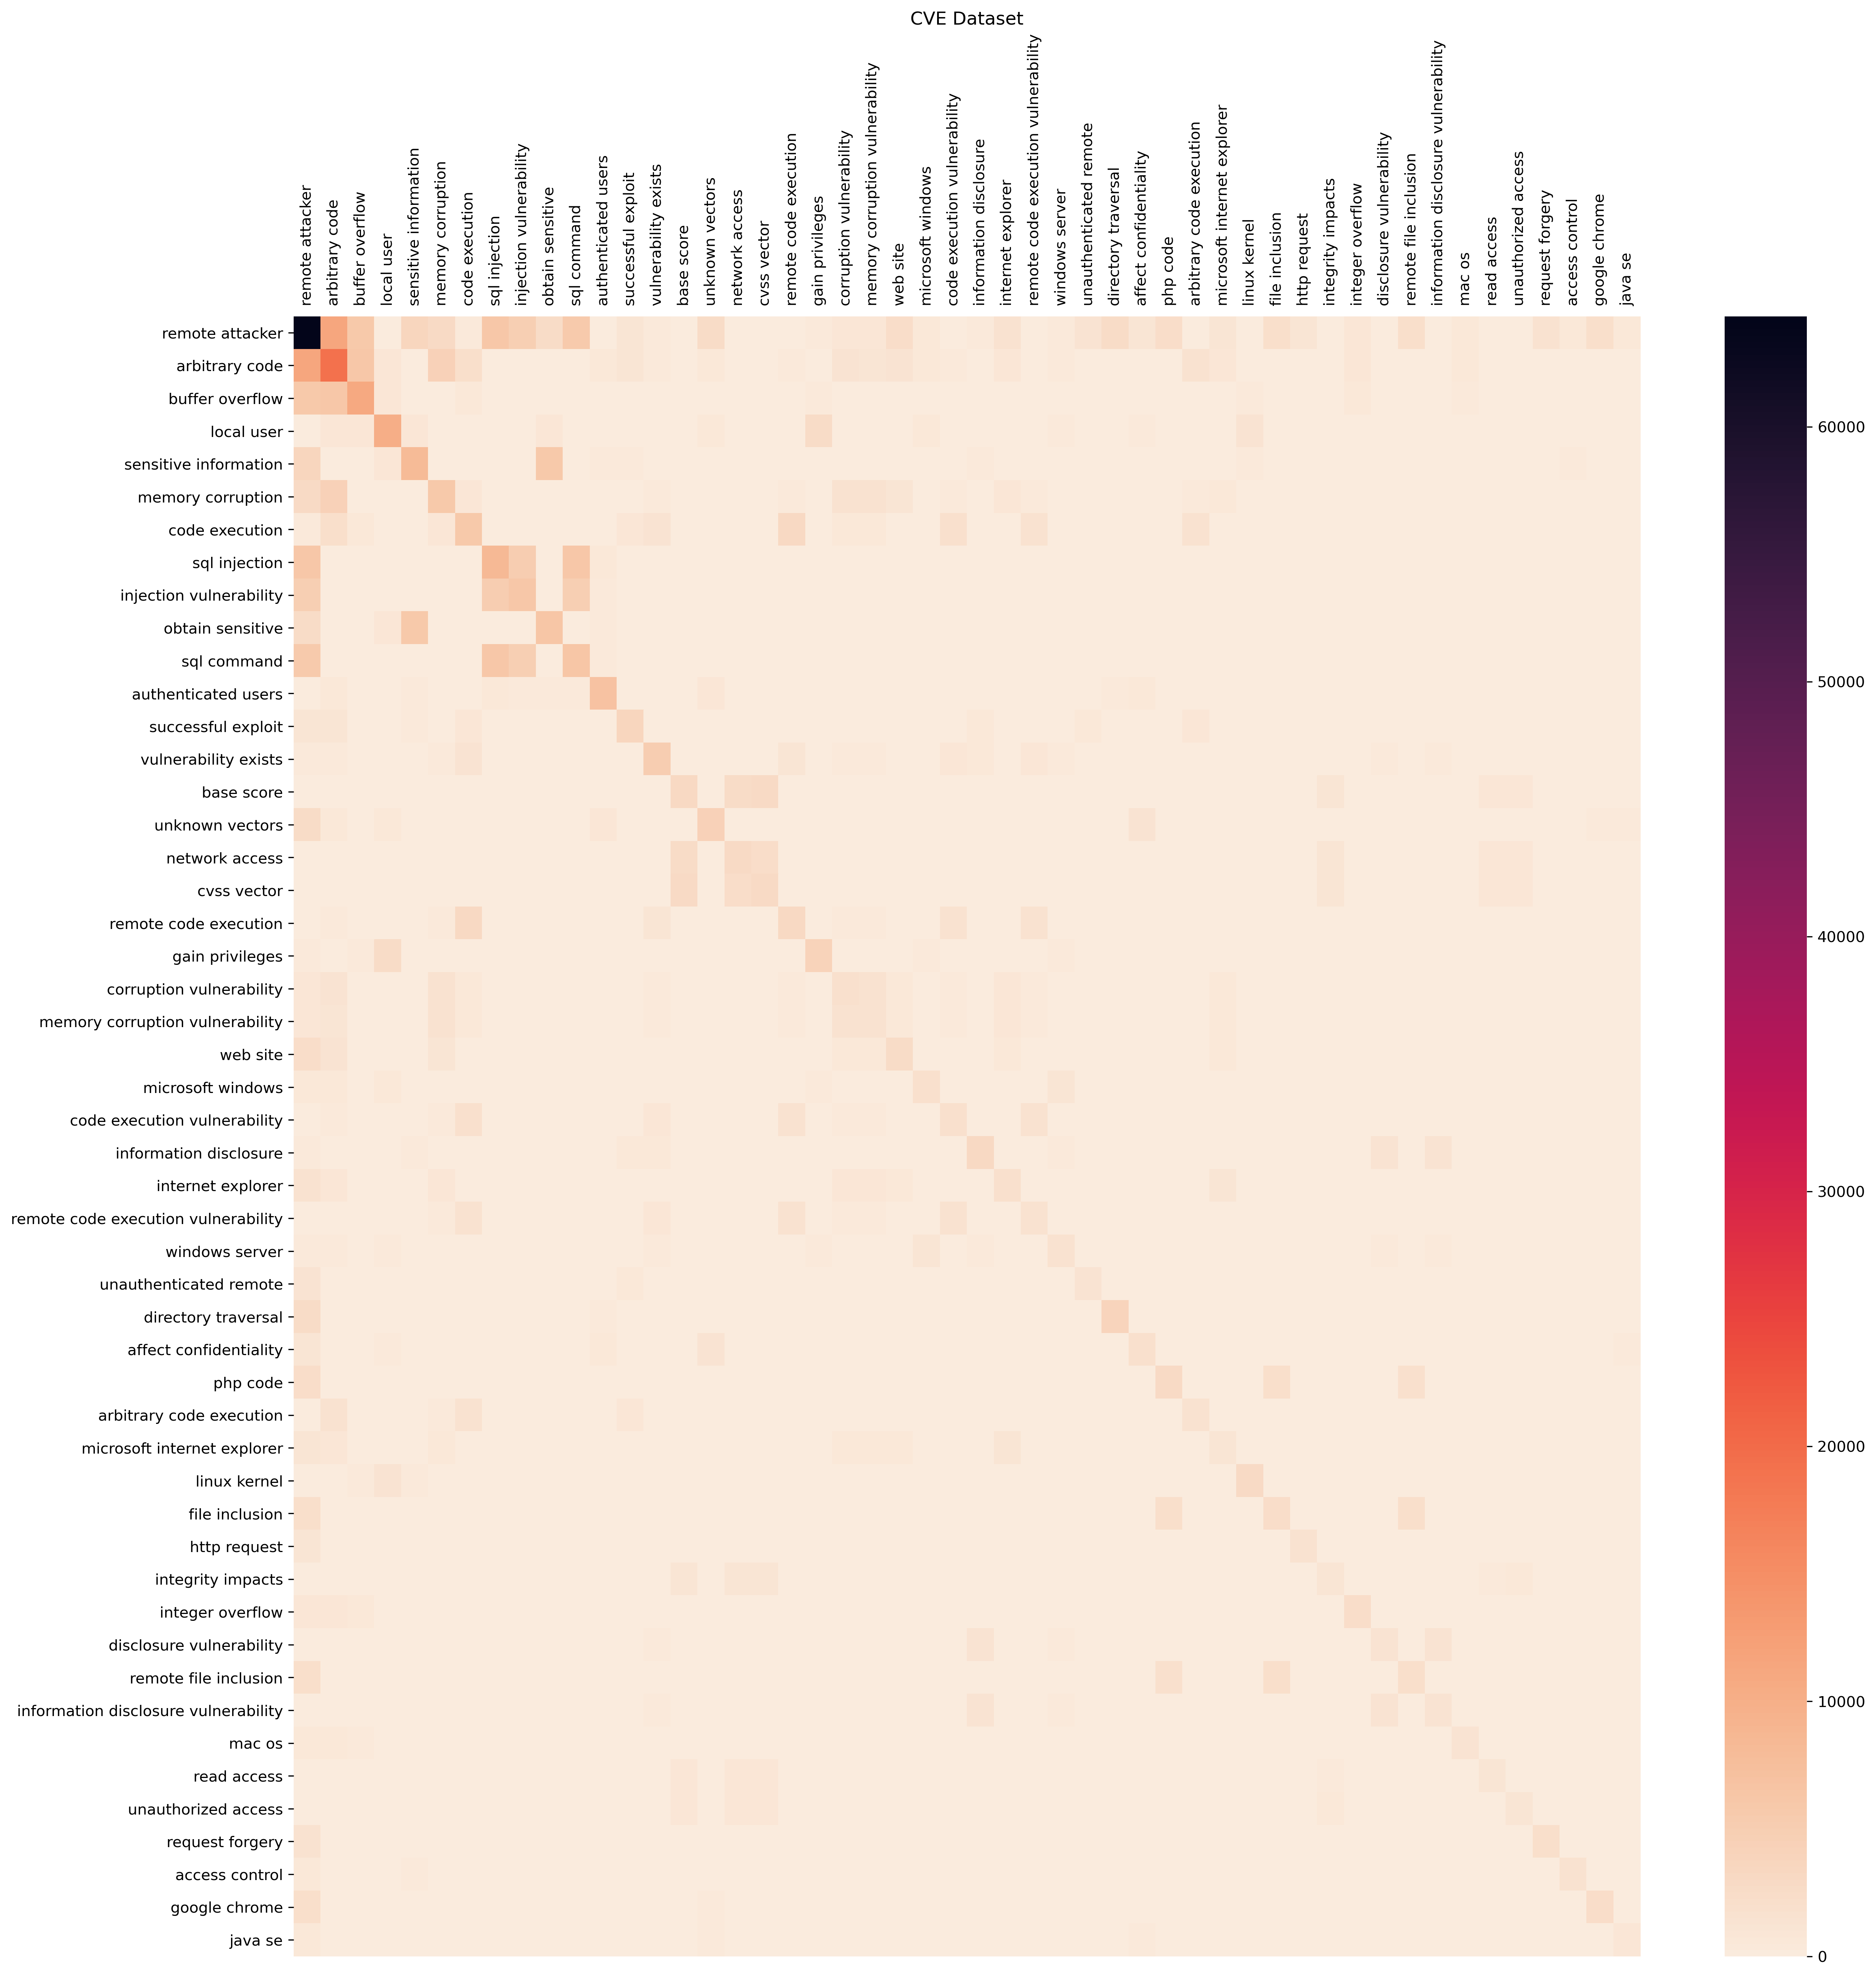

In [21]:
df = data_matrix.iloc[0:50,0:50]
plt.figure(figsize=(20,20))
ax = sns.heatmap(df, annot=False, cmap="rocket_r")
#plt.figure(figsize=(25,25))
#plt.imshow(df)
#plt.colorbar()
#plt.xticks(range(len(df)),df.columns, rotation=90)
#plt.yticks(range(len(df)),df.index)
#plt.ylabel('Frequency')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)
plt.title('CVE Dataset')
#plt.grid()
plt.savefig('Data/matrix_images/CVE_matrix_th8.jpg')
plt.show()

## Save Sorted Data Matrix to CSV

In [22]:
data_matrix.to_csv('Data/matrix_csv/CVE_coocurrence_matrix_th8.csv')